# Context 

>Scraped from CNBC, the Guardian, and Reuters official websites, the headlines in these datasets reflects the overview of the U.S. economy and stock market every day for the past year to 2 years.

https://www.kaggle.com/code/gudlaarunkumar/financial-news-headline-sentiment

# Content

> Data scraped from CNBC contains the headlines, last updated date, and the preview text of articles from the end of December 2017 to July 19th, 2020.
Data scraped from the Guardian Business contains the headlines and last updated date of articles from the end of December 2017 to July 19th, 2020 since the Guardian Business does not offer preview text.
Data scraped from Reuters contains the headlines, last updated date, and the preview text of articles from the end of March 2018 to July 19th, 2020.

# Inspiration

> I firmly believe that the sentiment of financial news articles reflects and directs the performance of the U.S. stock market. Therefore, by applying Natural Language Processing (NLP) through these headlines, I can see how the positivity/negativity of the score through each day correlate to the stock market's gains/losses.

The cover image was taken from https://hipwallpaper.com/stock-trader-wallpapers/

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [203]:
sns.set(style='darkgrid')

In [204]:
cnbc_df = pd.read_csv('cnbc_headlines.csv')

In [205]:
guardian_df = pd.read_csv('guardian_headlines.csv')

In [206]:
reuters_df = pd.read_csv('reuters_headlines.csv')

In [207]:
cnbc_df.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [208]:
cnbc_df.shape

(3080, 3)

In [209]:
cnbc_df.isna().sum()

Headlines      280
Time           280
Description    280
dtype: int64

In [210]:
cnbc_df.dropna(inplace=True)

In [211]:
cnbc_df.reset_index(inplace=True, drop=True)

In [212]:
guardian_df.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [213]:
guardian_df.shape

(17800, 2)

In [214]:
guardian_df.isna().sum()

Time         0
Headlines    0
dtype: int64

In [215]:
reuters_df.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [216]:
reuters_df.isna().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [217]:
reuters_df.shape

(32770, 3)

# Concat Three Dataframes

In [218]:
df = pd.concat([cnbc_df, reuters_df], axis=0, ignore_index=True)

# Method 1. Sentiment Analysis with TextBlob

> Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [27]:
!pip install -U textblob 

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [28]:
from textblob import TextBlob

In [29]:
text = df['Description'][0]

In [30]:
df.loc[3,'Description']

'Keith Bliss, IQ Capital CEO, joins "Closing Bell" to talk about the broader markets, including the performance of the S&P 500 and the Nasdaq.'

In [31]:
df[df.duplicated() == True].shape

(0, 3)

In [32]:
df.drop_duplicates(inplace=True)

In [33]:
text[0] 

'"'

In [34]:
TextBlob(text).sentiment

Sentiment(polarity=-0.1875, subjectivity=0.625)

# Sentiment Function for Labaling

In [35]:
def sentiment_analysis(text_df, description_column):
    #Create a function to get the subjectivity
    def get_subjectivity(text):
        return TextBlob(text).sentiment.subjectivity
    
    #Create a function to get the polarity
    def get_polarity(text):
        return TextBlob(text).sentiment.polarity
    
    
    #Create two new columns ‘Subjectivity’ & ‘Polarity’
    text_df['subjectivity'] = text_df[description_column].apply(get_subjectivity)
    text_df['polarity'] = text_df[description_column].apply(get_polarity)
    
    
    def get_analysis(score):
        
        if score > 0:
            return 'Positive'
        
        elif score == 0:
            return 'Neutral'
        
        else:
            return 'Negative'
        
        
    text_df['sentiment_label'] = text_df['polarity'].apply(get_analysis)
        
    return text_df    

In [36]:
sentiment_analysis(df, 'Description')

,Headlines,Time,Description,subjectivity,polarity,sentiment_label
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying...",0.625000,-0.187500,Negative
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin...",0.700000,-0.412500,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co...",0.550000,0.600000,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be...",0.000000,0.000000,Neutral
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020","""Look for the stocks of high-quality companies...",0.750000,-0.187500,Negative
...,...,...,...,...,...,...
35565,Malaysia says never hired British data firm at...,Mar 20 2018,The Malaysian government and the ruling party ...,0.233333,-0.066667,Negative
35566,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,German prosecutors said on Tuesday they had se...,0.280303,0.117424,Positive
35567,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,McDonald's Corp on Tuesday announced an approv...,0.333333,0.250000,Positive
35568,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,Pratt & Whitney will soon begin deliveries of ...,0.255556,0.025000,Positive


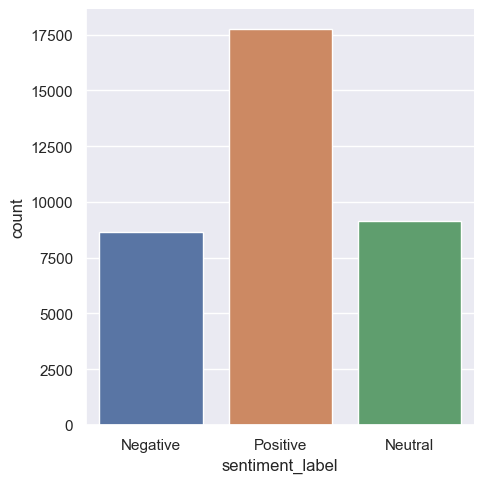

In [37]:
sns.catplot(data=df, x='sentiment_label',kind='count');

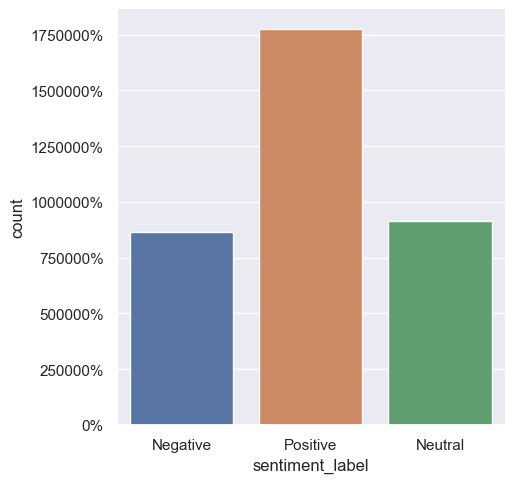

In [38]:
from  matplotlib.ticker import PercentFormatter

g = sns.catplot(
    data=df,
    x='sentiment_label',
    kind="count")

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

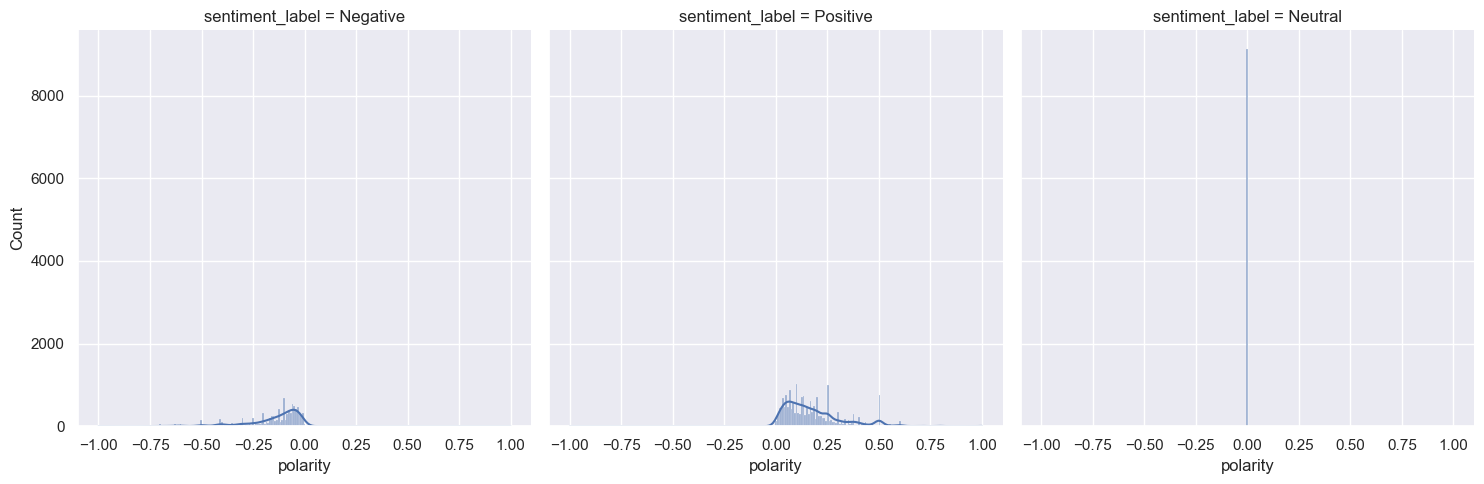

In [39]:
sns.displot(data=df, x='polarity', kde=True, col='sentiment_label');

# Data Preprocessing

In [219]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re

#import stopwords and text processing libraries

from nltk.corpus import stopwords


In [220]:
sent = sent_tokenize(df['Description'][0])

In [225]:
def preprocessing(text):
    
    
    
    #convert all to lowercase
    text = text.lower()
    
    #removing puntuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #remove stopwords
    stopwords = stopwords.words('english')
    word_token = [word for word in word_tokenize(text) if word.isalpha() and word not in stopwords]
    
    #stemizing
    stemmer = PorterStemmer()
    stem_word = [stemmer.stem(word) for word in word_token]
    
    
    
    #lemmitizing
    wnl = WordNetLemmatizer()
    lema_word = [wnl.lemmatize(word) for word in stem_word]
    
    return ' '.join(lema_word)
    

In [223]:
df['Description'] = df['Description'].apply(preprocessing)

In [224]:
df.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earn non covid compani lancet publish good...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high qualiti compani go lower even ...


In [47]:
df.sentiment_label.value_counts().index

Index(['Positive', 'Neutral', 'Negative'], dtype='object')

In [48]:
df.sentiment_label.value_counts() / len(df) * 100

Positive    49.995776
Neutral     25.690553
Negative    24.313670
Name: sentiment_label, dtype: float64

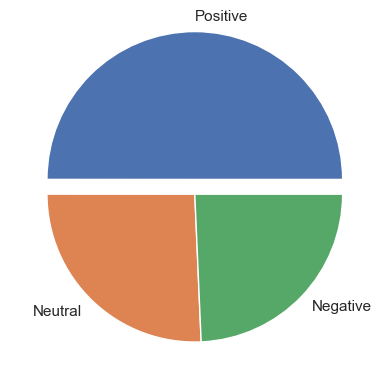

In [49]:
# colors = sns.color_palette('pastel')[0:5]
labels = df.sentiment_label.value_counts().index
data = df.sentiment_label.value_counts().values

plt.pie(data, labels = labels, explode=[0.1,0,0]);

# Machine Learning

In [ ]:
# 1. CountVectorizer
# 2. TfidTransformer

In [50]:
# split the dataset  into test and train 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import LinearSVC


In [51]:
X = df['Description']
y = df['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [52]:
# tfidf = TfidfVectorizer()
# X_train_new = tfidf.fit_transform(X_train).toarray()
# X_test_new = tfidf.transform(X_test).toarray()

In [53]:
# svc = SVC()
# svc.fit(X_train_new, y_train)
# y_pred = svc.predict(X_test_new)

In [54]:
# confusion_matrix(y_test, y_pred)

In [55]:
# svc.score(X_train_new, y_train)

In [56]:
# svc.score(X_test_new, y_test)

In [59]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [60]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [61]:
y_pred = pipeline.predict(X_test)

In [62]:
pipeline.score(X_train, y_train)

0.9500211178375334

In [63]:
pipeline.score(X_test, y_test)

0.8038856821061523

In [65]:
print('Model: LinearSVC')
print('accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model: LinearSVC
accuracy score: 0.8038856821061523
Confusion Matrix: [[1200  228  299]
 [ 115 1446  264]
 [ 210  277 3064]]
              precision    recall  f1-score   support

    Negative       0.79      0.69      0.74      1727
     Neutral       0.74      0.79      0.77      1825
    Positive       0.84      0.86      0.85      3551

    accuracy                           0.80      7103
   macro avg       0.79      0.78      0.79      7103
weighted avg       0.80      0.80      0.80      7103



# Method 2. Sentiment Analysis with SentimentIntensityAnalyzer

In [79]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# create sentiment intensity analyzer object
SIA = SentimentIntensityAnalyzer()

In [146]:
def mapper(data):
    if data > 0:
        return "Positive"
    elif data < 0:
        return "Negative"
    else:
        return "Neutral"

def sentiment_analysis(df, colm_name):
    
    # assigning polarity scores for description column
    df['polarity_scores'] = df[colm_name].apply(lambda w: SIA.polarity_scores(w))
    
    # picking only compound score(combined score)
    df['compound_score'] = df['polarity_scores'].apply(lambda x: x['compound'])
    
    # mapping the compound score to positive, negative or neutral
    df['ds_score'] = df['compound_score'].apply(mapper)
    
    df.drop(['polarity_scores', 'compound_score'], axis=1, inplace=True)
    
    return df

In [147]:
sentiment_analysis(df, 'Description')

,Headlines,Time,Description,subjectivity,polarity,sentiment_label,ds_score_Neutral,ds_score_Positive,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommended buying f...,0.625000,-0.187500,Negative,0,1,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightning round...,0.700000,-0.412500,Negative,0,0,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",pay earnings non covid company lancet publishe...,0.550000,0.600000,Positive,0,1,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capital ceo join closing bell t...,0.000000,0.000000,Neutral,0,1,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock high quality company going lower ev...,0.750000,-0.187500,Negative,0,0,Negative
...,...,...,...,...,...,...,...,...,...
35565,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian government ruling party tuesday deni...,0.233333,-0.066667,Negative,0,0,Negative
35566,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday searched volksw...,0.280303,0.117424,Positive,0,1,Positive
35567,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announced approved scien...,0.333333,0.250000,Positive,0,0,Negative
35568,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin delivery spare engine...,0.255556,0.025000,Positive,0,0,Negative


In [149]:
 df['ds_score'].value_counts() / len(df) * 100

Positive    50.297058
Negative    37.029424
Neutral     12.673518
Name: ds_score, dtype: float64

In [148]:
df['Description'] = df['Description'].apply(preprocessing)

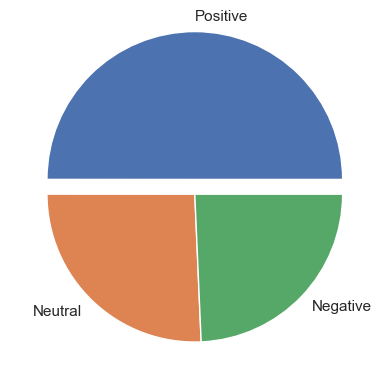

In [150]:
# colors = sns.color_palette('pastel')[0:5]
labels = df.sentiment_label.value_counts().index
data = df.sentiment_label.value_counts().values

plt.pie(data, labels = labels, explode=[0.1,0,0]);

# Machine Learning

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from tqdm import tqdm
from loguru import logger


In [170]:
lb = LabelEncoder()
df['ds_score'] = lb.fit_transform(df['ds_score'])

In [171]:
X = df['Description']
y = df['ds_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [172]:
pipeline2 = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [173]:
pipeline2.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [174]:
y_pred2 = pipeline2.predict(X_test)

In [175]:
pipeline2.score(X_train, y_train)

0.9817330705335774

In [176]:
pipeline2.score(X_test, y_test)

0.8655497677037871

In [92]:
print('Model: LinearSVC')
print('accuracy score:', accuracy_score(y_test, y_pred2))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

Model: LinearSVC
accuracy score: 0.8655497677037871
Confusion Matrix: [[2276   71  283]
 [ 142  565  193]
 [ 195   71 3307]]
              precision    recall  f1-score   support

    Negative       0.87      0.87      0.87      2630
     Neutral       0.80      0.63      0.70       900
    Positive       0.87      0.93      0.90      3573

    accuracy                           0.87      7103
   macro avg       0.85      0.81      0.82      7103
weighted avg       0.86      0.87      0.86      7103



In [103]:
kfold = KFold(n_splits=5, shuffle=True)
cross_val_score(pipeline2, X_train, y_train, cv=kfold).mean()

0.8486200994797095

In [124]:
params = {'svc__penalty':['l2', 'l1'], 'svc__C':[0.01, 0.1, 10, 100, 1000], 'tfidf__norm': ['l2']}
linear_svc = GridSearchCV(pipeline2, param_grid=params, cv=kfold, verbose=1)

In [125]:
linear_svc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svc', LinearSVC())]),
             param_grid={'svc__C': [0.01, 0.1, 10, 100, 1000],
                         'svc__penalty': ['l2', 'l1'], 'tfidf__norm': ['l2']},
             verbose=1)

In [126]:
linear_svc.best_score_

0.8390819231951039

In [127]:
linear_svc.best_params_

{'svc__C': 10, 'svc__penalty': 'l2', 'tfidf__norm': 'l2'}

In [133]:
!pip install xgboost

In [181]:
model_dict = {
    'lregression': LogisticRegression(),
    'linearsvc': LinearSVC(),
    'dtree': DecisionTreeClassifier(),
    'rforest': RandomForestClassifier(),
    'gbclassifier':GradientBoostingClassifier()
    'xgboost': XGBClassifier(),
    #'n_bayes': GaussianNB()    
}

In [182]:
model_scores = {}

for modelname, model in tqdm(model_dict.items()):
    pipeline = Pipeline([('tfidf', TfidfVectorizer()), (modelname, model)])
    pipeline.fit(X_train, y_train)
    
    
    kfold = KFold(n_splits=5, shuffle=True)
    score = cross_val_score(pipeline, X_train, y_train, cv=kfold).mean()
    logger.info(f'{modelname}: {score}')
    model_scores[modelname] = score
    
    

100%|████████████████████████████████████████████| 5/5 [17:03<00:00, 204.67s/it]


In [185]:
model_scores

{'lregression': 0.8121921267620262,
 'linearsvc': 0.8468608061378214,
 'dtree': 0.6872801440756852,
 'rforest': 0.745248594909647,
 'xgboost': 0.7861114894437755}

In [194]:
df = pd.DataFrame(list(model_scores.items()), columns=['model name', 'score']).style.background_gradient(cmap='coolwarm')

In [195]:
df

,model name,score
0,lregression,0.812192
1,linearsvc,0.846861
2,dtree,0.687280
3,rforest,0.745249
4,xgboost,0.786111


In [196]:
y_pred = pipeline.predict(X_test)

In [199]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2630
           1       0.70      0.48      0.57       900
           2       0.75      0.90      0.82      3573

    accuracy                           0.79      7103
   macro avg       0.78      0.71      0.73      7103
weighted avg       0.79      0.79      0.78      7103



In [226]:
def build_model(df):

    X = df['Description']
    y = df['ds_score']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)
    pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    logger.info(f'train model score: {pipeline.score(X_train, y_train)}')
    logger.info(f'test model score: {pipeline.score(X_test, y_test)}')
    logger.info(f'accuracy score: {accuracy_score(y_test, y_pred)}')

    return pipeline